In [1]:
import os.path
import math

In [2]:
prefixs = {'H1000':'H1000',
        'C60vdz':'C60_dz',
        'W50'   :'W50_631Gd',
        'Au14'  :'Au14_jorge_tzp_dkh'}
nBases = {'H1000': 1000, 'C60sto': 300, 'C60vdz': 840, 'W50':900, 'Au14':1148 }
taus = ['1e-4', '1e-6', '1e-8']
syss = ['H1000', 'C60vdz','W50','Au14']#'C60sto'
maxQs = [1000]#[1, 20, 50, 100, 200, 500, 1000, 2000, 5000, 20000]
root = '/Users/zty/Documents/calculation/RI/m1000Timing/'
SFmethods = ['spanfactororiginal', 'spanfactorreuseeri', 'spanfactorreuse']
TwoStepMethods = ['dynamic'] + SFmethods

In [3]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib.ticker import NullLocator
matplotlib.rcParams['pdf.fonttype'] = 42
rgb_colors = [(  0, 78,139), # Dark blue
              (  0,130,183), # Blue
              ( 97,202,228), # Light blue
              (255,205, 65), # Dark yellow
              (225, 27, 46), # Reddish
              (  0,  0,  0), # Black
             ]

colors = []
for c in rgb_colors:
    colors.append(tuple([float(p) / 255.0 for p in c]))
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 7
plt.rcParams["figure.figsize"] = [3.25, 3.5]

In [4]:
def latexScientific(x):
    s = '%.2e' % (x,)
    s = '$' + s.replace('e+0',r'\times 10^{') + '}$'
    return s

In [5]:
def parseOut(fname):
    sfTimes = {}
    if not os.path.exists(fname):
        return None
    f = open(fname)
    for line in f:
        if 'Cholesky-RI-Pivots-ERI count' in line:
            sfTimes['NERI1'] = int(line.split('= ')[-1])
        if 'Cholesky-RI-Pivots-ERI duration' in line:
            sfTimes['ERI1'] = float(line.split('= ')[-1].split()[0])
        if 'Cholesky-RI-ERIvec duration     =' in line:
            sfTimes['ERIvec'] = float(line.split('= ')[-1].split()[0])
        if 'Cholesky-RI-ERIcopy duration    =' in line:
            sfTimes['ERIcopy'] = float(line.split('= ')[-1].split()[0])
        if 'Cholesky-RI-ERItrans duration   =' in line:
            sfTimes['ERItrans'] = float(line.split('= ')[-1].split()[0])
        if 'Cholesky-RI-CDalg duration' in line:
            sfTimes['CDalg'] = float(line.split('= ')[-1].split()[0])
        if 'Cholesky-RI-CDalgMM duration    =' in line:
            sfTimes['CDalgMM'] = float(line.split('= ')[-1].split()[0])
        if 'Cholesky-RI-CDalgMV duration    =' in line:
            sfTimes['CDalgMV'] = float(line.split('= ')[-1].split()[0])
        if 'Cholesky-RI-Shrink count        =' in line:
            sfTimes['Shrink count'] = int(line.split('= ')[-1])
        if 'Cholesky-RI-Shrink duration     =' in line:
            sfTimes['Shrink'] = float(line.split('= ')[-1].split()[0])
        if 'Cholesky-RI-misc duration       =' in line:
            sfTimes['misc'] = float(line.split('= ')[-1].split()[0])
        if 'Cholesky-RI-SpanFactor-Pivots duration' in line:
            sfTimes['T1'] = float(line.split('= ')[-1].split()[0])
        if 'Cholesky-RI-Dynamic-Pivots duration' in line:
            sfTimes['T1'] = float(line.split('= ')[-1].split()[0])
        if 'Cholesky-RI-Traditional duration' in line:
            sfTimes['T1'] = float(line.split('= ')[-1].split()[0])
        if 'Cholesky-RI auxiliary dimension =' in line:
            sfTimes['Aux dim'] = int(line.split('= ')[-1])
        
        if 'Cholesky-RI-PivotRI-ERI count' in line:
            sfTimes['NERI2'] = int(line.split('= ')[-1])
        if 'Cholesky-RI-PivotRI-ERI duration' in line:
            sfTimes['ERI2'] = float(line.split('= ')[-1].split()[0])
        if 'Cholesky-RI-PivotRI-3index duration' in line:
            sfTimes['PivotRI-3index'] = float(line.split('= ')[-1].split()[0])
        if 'Cholesky-RI-PivotRI-2index duration' in line:
            sfTimes['PivotRI-2index'] = float(line.split('= ')[-1].split()[0])
        if 'RI-ERI3-Transformation-Cholesky duration' in line:
            sfTimes['Trans-Cholesky'] = float(line.split('= ')[-1].split()[0])
        if 'RI-ERI3-Transformation-TriInv duration' in line:
            sfTimes['Trans-TriInv'] = float(line.split('= ')[-1].split()[0])
        if 'RI-ERI3-Transformation-Gemm duration' in line:
            sfTimes['Trans-Gemm'] = float(line.split('= ')[-1].split()[0])
        if 'RI-ERI3-Transformation-Copy duration' in line:
            sfTimes['Trans-Copy'] = float(line.split('= ')[-1].split()[0])
        if 'RI-ERI3-Transformation duration' in line:
            sfTimes['Trans'] = float(line.split('= ')[-1].split()[0])
        if 'Cholesky-RI-PivotRI duration' in line:
            sfTimes['T2'] = float(line.split('= ')[-1].split()[0])
            
            
        if 'Cholesky-RI duration =' in line:
            sfTimes['T'] = float(line.split('= ')[-1].split()[0])
    f.close()
    return sfTimes

In [6]:
times = {}
for sys in syss:
    for method in SFmethods:
        for tau in taus:
            for maxQ in maxQs:
                fname = root + prefixs[sys] + '_' + method + '_t' + tau + '_D_n28_s1e-2_m' + str(maxQ) + '_Mpq_Ssig.out'
                times[(sys, method, tau, maxQ)] = parseOut(fname)
    method = 'dynamic'
    for sys in syss:
        for tau in taus:
            fname = root + prefixs[sys] + '_' + method + '_t' + tau + '_D_n28.out'
            times[(sys, method, tau)] = parseOut(fname)
    method = 'standard'
    for sys in syss:
        for tau in taus:
            fname = root + prefixs[sys] + '_' + method + '_t' + tau + '_D_n28.out'
            times[(sys, method, tau)] = parseOut(fname)

In [7]:
times

{('H1000', 'spanfactororiginal', '1e-4', 1000): {'NERI1': 112195000,
  'ERI1': 426.82,
  'ERIvec': 15.981,
  'CDalgMM': 0.31963,
  'CDalgMV': 3.4516,
  'Shrink count': 8,
  'Shrink': 0.15811,
  'misc': 0.64482,
  'T1': 20.555,
  'Aux dim': 3700,
  'NERI2': 1845006850,
  'ERI2': 6999.6,
  'PivotRI-3index': 285.99,
  'PivotRI-2index': 0.0055896,
  'Trans-Cholesky': 0.046341,
  'Trans-TriInv': 0.048499,
  'Trans-Gemm': 14.424,
  'Trans-Copy': 6.0869,
  'Trans': 20.606,
  'T2': 306.6,
  'T': 327.21},
 ('H1000', 'spanfactororiginal', '1e-6', 1000): {'NERI1': 561493325,
  'ERI1': 2150.9,
  'ERIvec': 80.955,
  'CDalgMM': 3.7262,
  'CDalgMV': 8.3238,
  'Shrink count': 30,
  'Shrink': 1.2944,
  'misc': 1.0963,
  'T1': 95.396,
  'Aux dim': 9168,
  'NERI2': 4546562472,
  'ERI2': 17449.0,
  'PivotRI-3index': 721.87,
  'PivotRI-2index': 0.033495,
  'Trans-Cholesky': 0.40422,
  'Trans-TriInv': 0.41707,
  'Trans-Gemm': 86.071,
  'Trans-Copy': 14.254,
  'Trans': 101.15,
  'T2': 823.05,
  'T': 918.49},

In [8]:
for sys in syss:
    for tau in taus:
        print('\n')
        print('----------',sys, tau, '----------')
        
        formatAll = '%20s ' + ' &'.join(['%8s'] * 9)
        print('    ', formatAll % ('method', 'NERI', 'ERI', 'CDalg', 'Shrink', 'T1', 'ERI', 'GEMM', 'T2', 'T'))
        
        nDigit = 1
        formatDigit = r'%8.'+str(nDigit)+'f'
        formatAll = '%20s & %5d & %8.2e &' + ' &'.join([formatDigit] * 2 + ['        '] * 5 + [formatDigit])
        
        
        k = (sys, 'standard', tau)
        ts = times[k]
        t1ERI = ts['ERIvec']
        n1ERI = ts['NERI1']
        t1CD = ts['CDalg']
        auxDim = ts['Aux dim']

        t = ts['T']

        print(formatAll
                      %('standard', auxDim, float(n1ERI), round(t1ERI,nDigit), round(t1CD,nDigit), round(t,nDigit)))
        
        formatDigit = r'%8.'+str(nDigit)+'f'
        formatAll = '%20s & %5d & %8.2e &' + ' &'.join([formatDigit] * 8)
        
        
        k = (sys, 'dynamic', tau)
        ts = times[k]
        t1ERI = ts['ERIvec']
        n1ERI = ts['NERI1']
        t1CD = ts['CDalg']
        t1Shrink = ts['Shrink']
        t1misc = ts['misc']
        t1 = ts['T1']
        auxDim = ts['Aux dim']

        t2ERI = ts['PivotRI-3index']
        t2GEMM = ts['Trans-Gemm']
        t2 = ts['T2']

        t = ts['T']

        print(formatAll
                      %('dynamic', auxDim, float(n1ERI), round(t1ERI,nDigit), round(t1CD,nDigit), round(t1Shrink,nDigit), round(t1,nDigit), round(t2ERI,nDigit), round(t2GEMM,nDigit), round(t2,nDigit), round(t,nDigit)))
        
        

        for method in SFmethods:
            k = (sys, method, tau, 1000)
            ts = times[k]
            t1ERI = ts['ERIvec']
            n1ERI = ts['NERI1']
            t1CD = ts['CDalgMM'] + ts['CDalgMV']
            t1Shrink = ts['Shrink']
            t1misc = ts['misc']
            t1 = ts['T1']
            auxDim = ts['Aux dim']

            t2ERI = ts['PivotRI-3index']
            t2GEMM = ts['Trans-Gemm']
            t2 = ts['T2']

            t = ts['T']
            
            print(formatAll
                      %(method, auxDim, float(n1ERI), round(t1ERI,nDigit), round(t1CD,nDigit), round(t1Shrink,nDigit), round(t1,nDigit), round(t2ERI,nDigit), round(t2GEMM,nDigit), round(t2,nDigit), round(t,nDigit)))



---------- H1000 1e-4 ----------
                   method     NERI &     ERI &   CDalg &  Shrink &      T1 &     ERI &    GEMM &      T2 &       T
            standard &  3700 & 1.85e+09 &   285.3 &   504.7 &         &         &         &         &         &   801.0
             dynamic &  3700 & 4.46e+07 &     6.5 &     6.7 &     0.4 &    16.0 &   281.3 &    14.1 &   301.4 &   317.4
  spanfactororiginal &  3700 & 1.12e+08 &    16.0 &     3.8 &     0.2 &    20.6 &   286.0 &    14.4 &   306.6 &   327.2
  spanfactorreuseeri &  3700 & 7.00e+07 &     9.7 &     3.8 &     0.2 &    15.0 &   287.2 &    14.1 &   307.1 &   322.1
     spanfactorreuse &  3700 & 7.00e+07 &     9.7 &     3.7 &     0.2 &    14.8 &   283.5 &    14.8 &   304.2 &   319.2


---------- H1000 1e-6 ----------
                   method     NERI &     ERI &   CDalg &  Shrink &      T1 &     ERI &    GEMM &      T2 &       T
            standard &  9168 & 4.59e+09 &   701.5 &  3086.4 &         &         &         &         

In [9]:
for sys in syss:
    for tau in taus:
        print('\n')
        print('----------',sys, tau, '----------')
        
        formatAll = '%12s ' + ' &'.join(['%8s'] * 9)
        print('    ', formatAll % ('method', 'NERI', 'ERI', 'CDalg', 'Shrink', 'T1', 'ERI', 'GEMM', 'T2', 'T'))
        
        nDigit = 1
        formatDigit = r'%8.'+str(nDigit)+'f'
        formatAll = '%12s & %8s &' + ' &'.join([formatDigit] * 2 + [''] * 5 + [formatDigit]) + r' \\'
        
        
        k = (sys, 'standard', tau)
        ts = times[k]
        t1ERI = ts['ERIvec']
        n1ERI = ts['NERI1']
        t1CD = ts['CDalg']
        auxDim = ts['Aux dim']

        t = ts['T']

        print(formatAll
                      %('Traditional', latexScientific(float(n1ERI)), round(t1ERI,nDigit), round(t1CD,nDigit), round(t,nDigit)))
        
        formatDigit = r'%8.'+str(nDigit)+'f'
        formatAll = '%12s & %8s &' + ' &'.join([formatDigit] * 3 + ['','%8s'] + [formatDigit] * 3) + r' \\'
        
        
        k = (sys, 'dynamic', tau)
        ts = times[k]
        t1ERI = ts['ERIvec']
        n1ERI = ts['NERI1']
        t1CD = ts['CDalg']
        t1Shrink = ts['Shrink']
        t1misc = ts['misc']
        t1 = ts['T1']

        n2ERI = ts['NERI2']
        t2ERI = ts['PivotRI-3index']
        t2GEMM = ts['Trans-Gemm']
        t2 = ts['T2']

        t = ts['T']

        print(formatAll
                      %('%    Dynamic', latexScientific(float(n1ERI)), round(t1ERI,nDigit), round(t1CD,nDigit), round(t1Shrink,nDigit), latexScientific(float(n2ERI)), round(t2ERI,nDigit), round(t2GEMM,nDigit), round(t,nDigit)))
        
        

        for method in SFmethods[:2]:
            k = (sys, method, tau, 1000)
            ts = times[k]
            t1ERI = ts['ERIvec']
            n1ERI = ts['NERI1']
            t1CD = ts['CDalgMM'] + ts['CDalgMV']
            t1Shrink = ts['Shrink']
            t1misc = ts['misc']
            t1 = ts['T1']

            n2ERI = ts['NERI2']
            t2ERI = ts['PivotRI-3index']
            t2GEMM = ts['Trans-Gemm']
            t2 = ts['T2']

            t = ts['T']
            
            methodStr = 'Span-Factor'
            if 'reuseeri' in method:
                methodStr = 'Dynamic-ERI'
            
            print(formatAll
                      %(methodStr, latexScientific(float(n1ERI)), round(t1ERI,nDigit), round(t1CD,nDigit), round(t1Shrink,nDigit), latexScientific(float(n2ERI)), round(t2ERI,nDigit), round(t2GEMM,nDigit), round(t,nDigit)))



---------- H1000 1e-4 ----------
           method     NERI &     ERI &   CDalg &  Shrink &      T1 &     ERI &    GEMM &      T2 &       T
 Traditional & $1.85\times 10^{9}$ &   285.3 &   504.7 & & & & & &   801.0 \\
%    Dynamic & $4.46\times 10^{7}$ &     6.5 &     6.7 &     0.4 & &$1.85\times 10^{9}$ &   281.3 &    14.1 &   317.4 \\
 Span-Factor & $1.12\times 10^{8}$ &    16.0 &     3.8 &     0.2 & &$1.85\times 10^{9}$ &   286.0 &    14.4 &   327.2 \\
 Dynamic-ERI & $7.00\times 10^{7}$ &     9.7 &     3.8 &     0.2 & &$1.85\times 10^{9}$ &   287.2 &    14.1 &   322.1 \\


---------- H1000 1e-6 ----------
           method     NERI &     ERI &   CDalg &  Shrink &      T1 &     ERI &    GEMM &      T2 &       T
 Traditional & $4.59\times 10^{9}$ &   701.5 &  3086.4 & & & & & &  3823.5 \\
%    Dynamic & $1.94\times 10^{8}$ &    27.8 &    75.3 &     3.0 & &$4.55\times 10^{9}$ &   721.3 &    86.6 &   933.2 \\
 Span-Factor & $5.61\times 10^{8}$ &    81.0 &    12.1 &     1.3 & &$4.55\ti

In [10]:
T1ERIaccels = {}
N1ERIratios = {}
for tau in taus:
    print()
    print('tau  sys    N1ERIratio  T1ERIaccel')
    T1ERIaccels[tau] = []
    N1ERIratios[tau] = []
    for sys in ['H1000','W50','C60vdz','Au14']:
        k1 = (sys, 'spanfactororiginal', tau, 1000)
        k2 = (sys, 'spanfactorreuseeri', tau, 1000)
        ts1 = times[k1]
        ts2 = times[k2]
        accelN = ts1['NERI1'] / ts2['NERI1']
        accelT = ts1['ERIvec'] / ts2['ERIvec']
        print(tau, sys, '\t%.1f\t%.1f'%(accelN, accelT))
        T1ERIaccels[tau].append(accelT)
        N1ERIratios[tau].append(accelN)


tau  sys    N1ERIratio  T1ERIaccel
1e-4 H1000 	1.6	1.7
1e-4 W50 	1.8	2.0
1e-4 C60vdz 	2.2	2.0
1e-4 Au14 	3.0	12.0

tau  sys    N1ERIratio  T1ERIaccel
1e-6 H1000 	2.1	2.1
1e-6 W50 	2.5	2.5
1e-6 C60vdz 	3.5	2.6
1e-6 Au14 	3.8	16.2

tau  sys    N1ERIratio  T1ERIaccel
1e-8 H1000 	2.5	2.6
1e-8 W50 	2.9	2.7
1e-8 C60vdz 	4.5	3.5
1e-8 Au14 	4.6	21.3


In [11]:
angulars = [0, (1*3*2+2*6*1)/19, (1*3*2+2*5*1)/14, (1*3*6 + 2*5*5 + 3*7*3 + 4*9*1)/82]
# angulars = [0, 4/10, 4/6, 29/24]

<IPython.core.display.Javascript object>


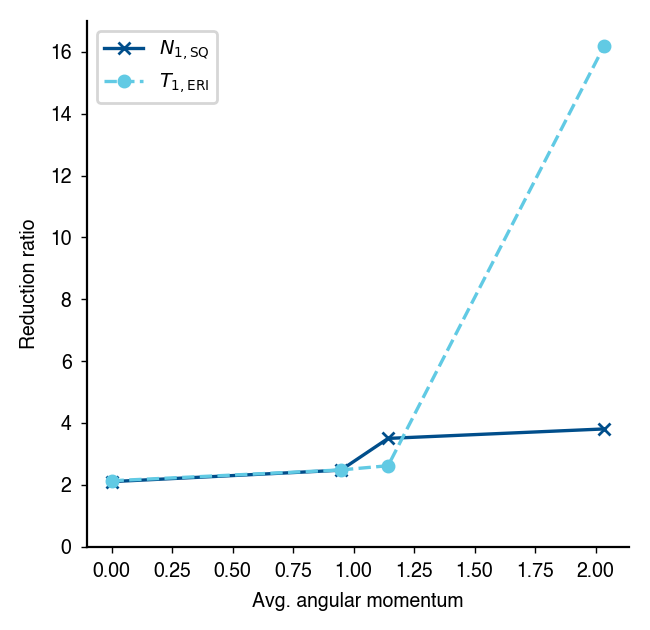

In [12]:
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 7
plt.rcParams["figure.figsize"] = [3.25, 3.15]
fig, ax = plt.subplots()
#     fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#     ax.spines['top'].set_position('zero')
plt.tick_params(
    direction='out',
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,       # ticks along the bottom edge are on
    top=False,         # ticks along the top edge are off
    width=0.5,
    length=2)
plt.tick_params(
    direction='out',
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=True,         # ticks along the left edge are on
    right=False,       # ticks along the left edge are off
    width=0.5,
    length=2)

plt.plot(angulars, N1ERIratios['1e-6'], label = r'$N_{\rm 1,SQ}$', color = colors[0], marker='x', markersize=4.0, linestyle = '-', linewidth=1.2)
plt.plot(angulars, T1ERIaccels['1e-6'], label = r'$T_{\rm 1,ERI}$', color = colors[2], marker='o', markersize=4.0, linestyle = '--', linewidth=1.2)

# plt.xlim([0,17])
plt.ylim([0,17])
plt.xlabel("Avg. angular momentum")
plt.ylabel("Reduction ratio")

# plt.text(21, 2.5, r'$T_1(\tau=10^{-4})$')
# plt.text(21, 5.2, r'$T_1(\tau=10^{-6})$')
# plt.text(21, 16, r'$T_2(\tau=10^{-4})$')
# plt.annotate(r'$T_2(\tau=10^{-6})$', xy = (22,18.5), xytext = (15, 24), arrowprops={'arrowstyle':'->'})

plt.legend()

# plt.loglog(rs, dEs[2], marker='o', markersize=2.0, color = colors[1], linewidth=1.0)
# plt.xticks(rs,rs)
# plt.yticks([1e-2, 1e-4, 1e-6, 1e-8])
# ax.xaxis.set_minor_locator(NullLocator())
# ax.yaxis.set_minor_locator(NullLocator())
# plt.title("Absolute energy error of atomic X2c")
# plt.xlabel(r"$r$ (N$-$O) / $\rm \AA$")
# plt.ylabel(r"$\Delta E$ / $E_{\rm h}$")
# plt.text(3.0, 1e-3, 'Nitric oxide (NO)')
# plt.text(3.0, 2e-4, 'GHF/6-31G(3df)')
# plt.text(0.7, 8e-7, r'$|E$(atomic-X2c)$-E$(full-X2c)$|$')
plt.tight_layout()
plt.savefig('tmp.pdf')

In [13]:
TERIaccels = {}
for tau in taus:
    print()
    print('tau  sys    N1ERIratio  T1ERIaccel')
    TERIaccels[tau] = []
    for sys in ['H1000','W50','C60vdz','Au14']:
        k1 = (sys, 'standard', tau)
        k2 = (sys, 'spanfactorreuseeri', tau, 1000)
        ts1 = times[k1]
        ts2 = times[k2]
        accelT = ts1['ERIvec'] / ts2['PivotRI-3index']
        print(tau, sys, '\t%.1f\t%.1f'%(accelN, accelT))
        TERIaccels[tau].append(accelT)


tau  sys    N1ERIratio  T1ERIaccel
1e-4 H1000 	4.6	1.0
1e-4 W50 	4.6	3.2
1e-4 C60vdz 	4.6	3.4
1e-4 Au14 	4.6	13.2

tau  sys    N1ERIratio  T1ERIaccel
1e-6 H1000 	4.6	1.0
1e-6 W50 	4.6	3.0
1e-6 C60vdz 	4.6	3.5
1e-6 Au14 	4.6	14.8

tau  sys    N1ERIratio  T1ERIaccel
1e-8 H1000 	4.6	1.0
1e-8 W50 	4.6	3.4
1e-8 C60vdz 	4.6	3.9
1e-8 Au14 	4.6	15.7


In [14]:
TERIaccels = {}
for tau in taus:
    print()
    print('tau  sys\tCDalg/MM')
    TERIaccels[tau] = []
    for sys in ['H1000','W50','C60vdz','Au14']:
        k1 = (sys, 'standard', tau)
        k2 = (sys, 'spanfactorreuseeri', tau, 1000)
        ts1 = times[k1]
        ts2 = times[k2]
        accelT = ts1['CDalg'] / ts2['Trans-Gemm']
        print(tau, sys, '\t%.1f'%(accelT))
        TERIaccels[tau].append(accelT)


tau  sys	CDalg/MM
1e-4 H1000 	35.8
1e-4 W50 	37.5
1e-4 C60vdz 	34.9
1e-4 Au14 	34.3

tau  sys	CDalg/MM
1e-6 H1000 	36.1
1e-6 W50 	35.4
1e-6 C60vdz 	36.0
1e-6 Au14 	32.1

tau  sys	CDalg/MM
1e-8 H1000 	35.1
1e-8 W50 	32.7
1e-8 C60vdz 	36.0
1e-8 Au14 	33.0


In [15]:
accelConvs = {}
accelOris = {}
accelDyns = {}
repeatConvs = {}
repeatOris = {}
repeatDyns = {}
for tau in taus:
    print()
    print('tau  sys\tCDalg/MM')
    accelConvs[tau] = []
    accelOris[tau] = []
    accelDyns[tau] = []
    repeatConvs[tau] = []
    repeatOris[tau] = []
    repeatDyns[tau] = []
    for sys in ['H1000','W50','C60vdz','Au14']:
        k1 = (sys, 'standard', tau)
        k2 = (sys, 'spanfactororiginal', tau, 1000)
        k3 = (sys, 'spanfactorreuseeri', tau, 1000)
        ts1 = times[k1]
        ts2 = times[k2]
        ts3 = times[k3]
        accelConv = ts1['ERIvec'] / ts2['PivotRI-3index']
        accelOri = (ts2['ERIvec'] + ts2['PivotRI-3index']) / ts2['PivotRI-3index']
        accelDyn = (ts3['ERIvec'] + ts3['PivotRI-3index']) / ts3['PivotRI-3index']
        repeatConv = ts1['NERI1'] / ts2['NERI2']
        repeatOri = (ts2['NERI1'] + ts2['NERI2']) / ts2['NERI2']
        repeatDyn = (ts3['NERI1'] + ts3['NERI2']) / ts2['NERI2']
        print(tau, sys, '\t%.1f\t%.1f\t%.1f\t%.1f\t%.1f\t%.1f'%(repeatConv, accelConv, repeatOri, accelOri, repeatDyn, accelDyn))
        accelConvs[tau].append(accelConv)
        accelOris[tau].append(accelOri)
        accelDyns[tau].append(accelDyn)
        repeatConvs[tau].append(repeatConv)
        repeatOris[tau].append(repeatOri)
        repeatDyns[tau].append(repeatDyn)


tau  sys	CDalg/MM
1e-4 H1000 	1.0	1.0	1.1	1.1	1.0	1.0
1e-4 W50 	3.5	3.2	1.1	1.1	1.0	1.0
1e-4 C60vdz 	5.4	3.4	1.5	1.3	1.2	1.1
1e-4 Au14 	8.1	13.1	1.4	2.3	1.1	1.1

tau  sys	CDalg/MM
1e-6 H1000 	1.0	1.0	1.1	1.1	1.1	1.1
1e-6 W50 	3.1	3.1	1.1	1.1	1.0	1.0
1e-6 C60vdz 	5.1	3.5	1.8	1.4	1.2	1.2
1e-6 Au14 	7.7	14.8	1.7	3.1	1.2	1.1

tau  sys	CDalg/MM
1e-8 H1000 	1.0	1.0	1.2	1.2	1.1	1.1
1e-8 W50 	2.9	3.3	1.1	1.1	1.0	1.0
1e-8 C60vdz 	4.6	3.8	2.0	1.6	1.2	1.2
1e-8 Au14 	7.7	15.6	1.9	3.7	1.2	1.1


<IPython.core.display.Javascript object>


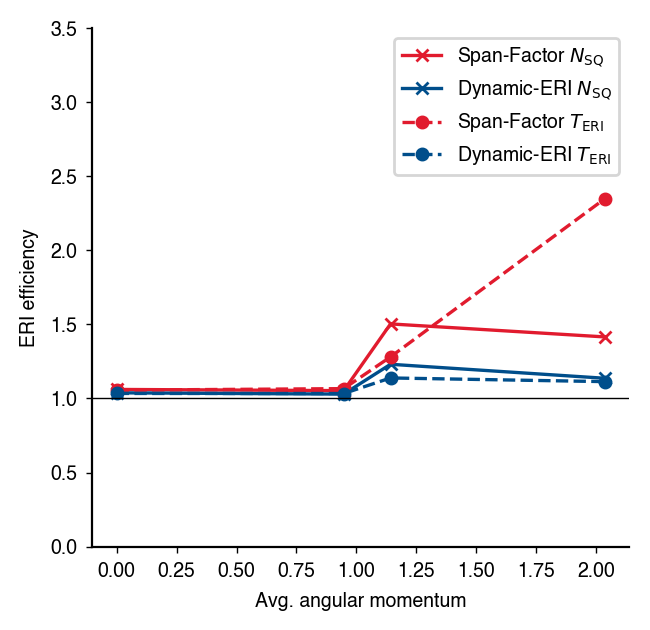

In [20]:
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 7
plt.rcParams["figure.figsize"] = [3.25, 3.15]
fig, ax = plt.subplots()
#     fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#     ax.spines['top'].set_position('zero')
plt.tick_params(
    direction='out',
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,       # ticks along the bottom edge are on
    top=False,         # ticks along the top edge are off
    width=0.5,
    length=2)
plt.tick_params(
    direction='out',
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=True,         # ticks along the left edge are on
    right=False,       # ticks along the left edge are off
    width=0.5,
    length=2)

tau = '1e-4'
# plt.plot(angulars, repeatConvs[tau], label = r'$T_{\rm 1,ERI}$', color = colors[2], marker='x', markersize=4.0, linestyle = '-', linewidth=1.2)
plt.plot(angulars, repeatOris[tau], label = r'Span-Factor $N_{\rm SQ}$', color = colors[4], marker='x', markersize=4.0, linestyle = '-', linewidth=1.2)
plt.plot(angulars, repeatDyns[tau], label = r'Dynamic-ERI $N_{\rm SQ}$', color = colors[0], marker='x', markersize=4.0, linestyle = '-', linewidth=1.2)

# plt.plot(angulars, accelConvs[tau], label = r'$T_{\rm 1,ERI}$', color = colors[2], marker='o', markersize=4.0, linestyle = '--', linewidth=1.2)
plt.plot(angulars, accelOris[tau], label = r'Span-Factor $T_{\rm ERI}$', color = colors[4], marker='o', markersize=4.0, linestyle = '--', linewidth=1.2)
plt.plot(angulars, accelDyns[tau], label = r'Dynamic-ERI $T_{\rm ERI}$', color = colors[0], marker='o', markersize=4.0, linestyle = '--', linewidth=1.2)

plt.axhline(1.0, color = 'black', linestyle = '-', linewidth=0.5)

# plt.xlim([0,17])
plt.ylim([0,3.5])
plt.xlabel("Avg. angular momentum")
plt.ylabel("ERI efficiency")

# plt.text(21, 2.5, r'$T_1(\tau=10^{-4})$')
# plt.text(21, 5.2, r'$T_1(\tau=10^{-6})$')
# plt.text(21, 16, r'$T_2(\tau=10^{-4})$')
# plt.annotate(r'$T_2(\tau=10^{-6})$', xy = (22,18.5), xytext = (15, 24), arrowprops={'arrowstyle':'->'})

plt.legend()

# plt.loglog(rs, dEs[2], marker='o', markersize=2.0, color = colors[1], linewidth=1.0)
# plt.yticks([5,10,15,20])
# plt.yticks([1e-2, 1e-4, 1e-6, 1e-8])
# ax.xaxis.set_minor_locator(NullLocator())
# ax.yaxis.set_minor_locator(NullLocator())
# plt.title("Absolute energy error of atomic X2c")
# plt.xlabel(r"$r$ (N$-$O) / $\rm \AA$")
# plt.ylabel(r"$\Delta E$ / $E_{\rm h}$")
# plt.text(3.0, 1e-3, 'Nitric oxide (NO)')
# plt.text(3.0, 2e-4, 'GHF/6-31G(3df)')
# plt.text(0.7, 8e-7, r'$|E$(atomic-X2c)$-E$(full-X2c)$|$')
plt.tight_layout()
plt.savefig('tmp.pdf')

In [21]:
repeatOris['1e-4']

[1.0608100723311678,
 1.0526183178543824,
 1.5029264999420595,
 1.4152605484480782]

In [22]:
accelOris['1e-4']

[1.0558795762089583,
 1.0661704720029666,
 1.2804786224055524,
 2.3467071057192372]

In [23]:
accelDyns['1e-4']

[1.0337241451354553,
 1.0330686820472024,
 1.1382013308977035,
 1.1134795142832183]

In [24]:
repeatDyns['1e-4']

[1.0379353675570364, 1.029257062228791, 1.2305770561674307, 1.1362349607543267]